# Modern Portfolio Theory
Modern portfolio theory also popularly called as `Mean-Variance Portofolio Theory (MVP)` is a major breakthrough in finance. It is based on the premises that returns are normally distributed and by looking at mean and variance, we can essentialy describe the distribution of end-of-period wealth.

The basic idea of this theory is to achieve diversification by constructuing portfolio for a minimal portfolio risk or maximal portfolio returns given a certain level of risk. Accordingly, the `Efficient Frontier` is a set of optimal portfolios in the risk-return spectrum and portfolios located under the `Efficient Frontier` curve are considered sub-optimal.

This means that the portfolios on the frontier offer

`Highest expected return for a given level of risk`
`Lowest level of risk for a given level of expected returns`
In essence, the investors goal should be to select a level of risk that he/she is comfortable with and then find a portfolio that maximizes returns based on the selected risk level.

In [1]:
# Import base libraries
from numpy import *
from numpy.linalg import multi_dot
import pandas as pd
import yfinance as yf

# Import cufflinks
import cufflinks as cf
cf.set_config_file(
    offline=True, 
    dimensions=((1000,600)),
    theme= 'henanigans')

# Import plotly express for EF plot
import plotly.express as px
px.defaults.template = "plotly_dark"
px.defaults.width = 1000
px.defaults.height = 600

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [31]:
# # FAANG stocklist
symbols = ['AAPL', 'AMZN', 'MSFT', 'GOOG', 'NFLX' ]

# # Number of assets
# numofasset = len(symbols)

# # Number of portfolio for optimization
# numofportfolio = 5000

In [3]:
# # Fetch data from yahoo finance for last six years
# faangstocks = yf.download(symbols, start='2015-01-01', end='2022-12-31', progress=False)['Adj Close']

# # Verify the output
# faangstocks.tail()

In [4]:
# # Let's save the data for future use
# faangstocks.to_csv('3. Portfolio Optimisation/data/faang_stocks.csv')

In [5]:
# Load locally stored data
df = pd.read_csv('data/faang_stocks.csv', index_col=0, parse_dates=True)

# Check first 5 values 
df.head()

AAPL     AMZN       GOOG       MSFT       NFLX
Date                                                                          
2015-01-02 00:00:00-05:00  24.565701  15.4260  26.168653  40.709469  49.848572
2015-01-05 00:00:00-05:00  23.873644  15.1095  25.623152  40.335110  47.311428
2015-01-06 00:00:00-05:00  23.875885  14.7645  25.029282  39.743107  46.501431
2015-01-07 00:00:00-05:00  24.210682  14.9210  24.986401  40.248039  46.742859
2015-01-08 00:00:00-05:00  25.140913  15.0230  25.065184  41.432064  47.779999

Descriptive Statistics

In [6]:
summary = df.describe().T
summary

count        mean         std        min         25%         50%  \
AAPL  2014.0   71.284846   49.429077  20.883032   29.361794   46.299198   
AMZN  2014.0   88.298323   49.962144  14.347500   40.925875   86.978500   
GOOG  2014.0   67.901388   34.276966  24.560070   39.901001   56.965250   
MSFT  2014.0  138.339542   89.410584  35.172424   57.597827  105.026615   
NFLX  2014.0  287.268426  162.132491  45.547142  128.992493  288.284988   

             75%         max  
AAPL  122.232388  180.683884  
AMZN  127.878502  186.570496  
GOOG   88.430124  150.709000  
MSFT  217.942764  339.075592  
NFLX  381.657501  691.690002

In [7]:
df

AAPL       AMZN       GOOG        MSFT  \
Date                                                                      
2015-01-02 00:00:00-05:00   24.565701  15.426000  26.168653   40.709469   
2015-01-05 00:00:00-05:00   23.873644  15.109500  25.623152   40.335110   
2015-01-06 00:00:00-05:00   23.875885  14.764500  25.029282   39.743107   
2015-01-07 00:00:00-05:00   24.210682  14.921000  24.986401   40.248039   
2015-01-08 00:00:00-05:00   25.140913  15.023000  25.065184   41.432064   
...                               ...        ...        ...         ...   
2022-12-23 00:00:00-05:00  131.658981  85.250000  89.809998  238.133545   
2022-12-27 00:00:00-05:00  129.831772  83.040001  87.930000  236.367981   
2022-12-28 00:00:00-05:00  125.847855  81.820000  86.459999  233.944031   
2022-12-29 00:00:00-05:00  129.412415  84.180000  88.949997  240.407837   
2022-12-30 00:00:00-05:00  129.731918  84.000000  88.730003  239.220825   

                                 NFLX  
Date                                   
2015-01-02 00:00:00-05:00   49.848572  
2015-01-05 00:00:00-05:00   47.311428  
2015-01-06 00:00:00-05:00   46.501431  
2015-01-07 00:00:00-05:00   46.742859  
2015-01-08 00:00:00-05:00   47.779999  
...                               ...  
2022-12-23 00:00:00-05:00  294.959991  
2022-12-27 00:00:00-05:00  284.170013  
2022-12-28 00:00:00-05:00  276.880005  
2022-12-29 00:00:00-05:00  291.119995  
2022-12-30 00:00:00-05:00  294.880005  

[2014 rows x 5 columns]

Visualize Data

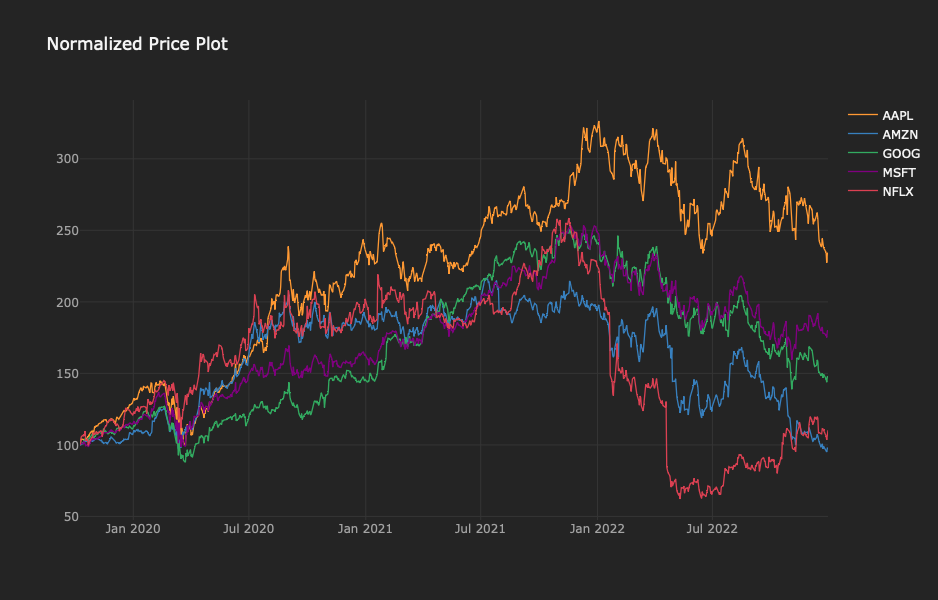

In [8]:
# Plot price history
df.iloc[1200:,:].normalize().iplot(kind='line', title='Normalized Price Plot')

Calculate Returns

In [9]:
# Calculate returns 
returns = df.pct_change().fillna(0)
returns.head()

AAPL      AMZN      GOOG      MSFT      NFLX
Date                                                                       
2015-01-02 00:00:00-05:00  0.000000  0.000000  0.000000  0.000000  0.000000
2015-01-05 00:00:00-05:00 -0.028172 -0.020517 -0.020846 -0.009196 -0.050897
2015-01-06 00:00:00-05:00  0.000094 -0.022833 -0.023177 -0.014677 -0.017121
2015-01-07 00:00:00-05:00  0.014022  0.010600 -0.001713  0.012705  0.005192
2015-01-08 00:00:00-05:00  0.038422  0.006836  0.003153  0.029418  0.022188

# Annualized Returns
In MVP, the average returns play an important role as they are used to approximate the expected returns.

In [10]:
# Calculate annual returns
annual_returns = (returns.mean() * 252)
annual_returns

AAPL    0.253133
AMZN    0.267211
GOOG    0.192799
MSFT    0.261251
NFLX    0.328999
dtype: float64

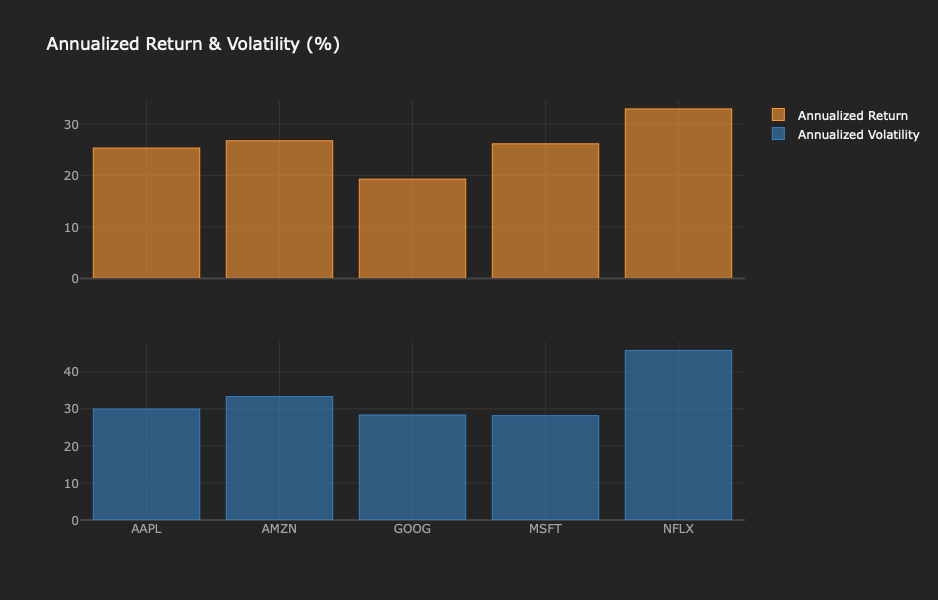

In [11]:
# Plot annualized return and volatility
pd.DataFrame({
    'Annualized Return' : round(returns.mean() * 252 * 100,2),
    'Annualized Volatility': round(returns.std()*sqrt(252) * 100,2)
}).iplot(kind='bar', title='Annualized Return & Volatility (%)', shared_xaxes = True, subplots=True)

Annualized Volatilities

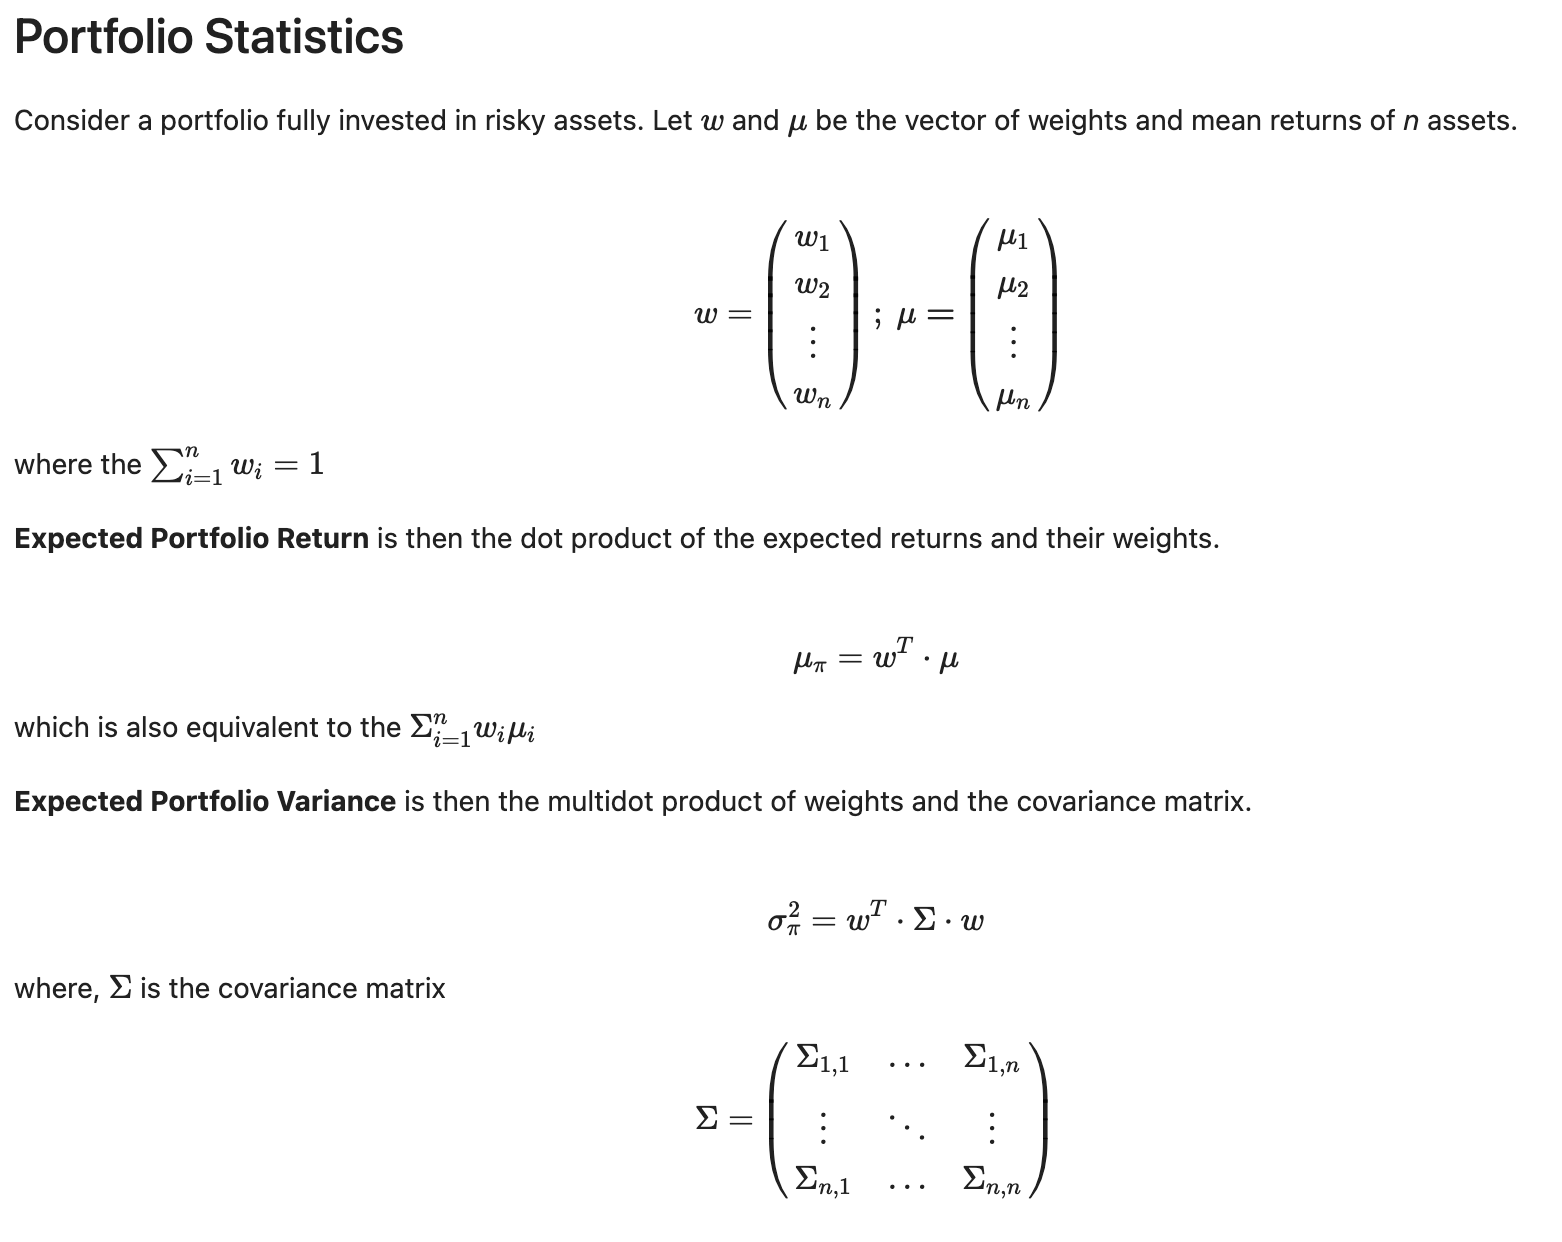

# Equal Weighted Portfolio
Assume a portoflio composed of all five stocks with equal weighting. We will now calculate the portfolio statistics.

In [12]:
# wts = numofasset * [1./numofasset]
wts = 5 * [1./5]
array(wts).shape

(5,)

In [13]:
# Reshape
# wts = numofasset * [1./numofasset]
wts = array(wts)[:,newaxis]
wts

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [14]:
# Check shape
wts.shape

(5, 1)

In [15]:
# Derive returns
ret = array(returns.mean() * 252)[:,newaxis]      
ret

array([[0.25313285],
       [0.26721054],
       [0.19279939],
       [0.26125054],
       [0.32899927]])

In [16]:
# Portfolio returns
wts.T @ ret 

array([[0.26067852]])

In [17]:
# Portfolio Variance & Volatility
cov = returns.cov() * 252
var = multi_dot([wts.T, cov, wts])
sqrt(var)

array([[0.26917587]])

# Portfolio Simulation
Now, we will implement a Monte Carlo simulation to generate random portfolio weights on a larger scale and calculate the expected portfolio return, variance and sharpe ratio for every simulated allocation. We will then identify the portfolio with a highest return for per unit of risk.

In [18]:
def portfolio_simulation(returns):

    # Initialize the lists
    rets = []; vols = []; wts = []

    # Simulate 5,000 portfolios
    numofportfolio = 50000
    numofasset = 5
    for i in range (numofportfolio):
        
        # Generate random weights
        weights = random.random(numofasset)[:, newaxis]
        
        # Set weights such that sum of weights equals 1
        weights /= sum(weights)
        
        # Portfolio statistics
        rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])        
        vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
        wts.append(weights.flatten())

    # Create a dataframe for analysis
    portdf = 100*pd.DataFrame({
        'port_rets': array(rets).flatten(),
        'port_vols': array(vols).flatten(),
        'weights': list(array(wts))
        })
    
    portdf['sharpe_ratio'] = portdf['port_rets'] / portdf['port_vols']

    return round(portdf,2)

In [19]:
# Create a dataframe for analysis
temp = portfolio_simulation(returns)
temp.head()

port_rets  port_vols                                            weights  \
0      24.82      25.84  [17.06410591246727, 14.802283850149529, 22.313...   
1      26.62      26.94  [23.374945185836268, 5.603214610143602, 12.956...   
2      27.27      27.70  [28.83154800526237, 9.152627109765517, 8.08444...   
3      23.82      25.94  [9.476103537037291, 17.229685034124877, 37.850...   
4      26.69      27.00  [13.15273094740228, 15.011124403831557, 11.911...   

   sharpe_ratio  
0          0.96  
1          0.99  
2          0.98  
3          0.92  
4          0.99

In [20]:
# Get the max sharpe portfolio stats
temp.iloc[temp.sharpe_ratio.idxmax()]

port_rets                                                   27.61
port_vols                                                   27.46
weights         [22.217900335031352, 9.693737649244785, 0.3729...
sharpe_ratio                                                 1.01
Name: 2111, dtype: object

In [21]:
# Verify the above result
temp.describe().T

count       mean       std    min    25%    50%    75%    max
port_rets     50000.0  26.066678  1.228775  20.67  25.24  26.07  26.89  31.26
port_vols     50000.0  27.492788  1.356959  25.62  26.50  27.21  28.15  39.33
sharpe_ratio  50000.0   0.948629  0.029022   0.76   0.93   0.95   0.97   1.01

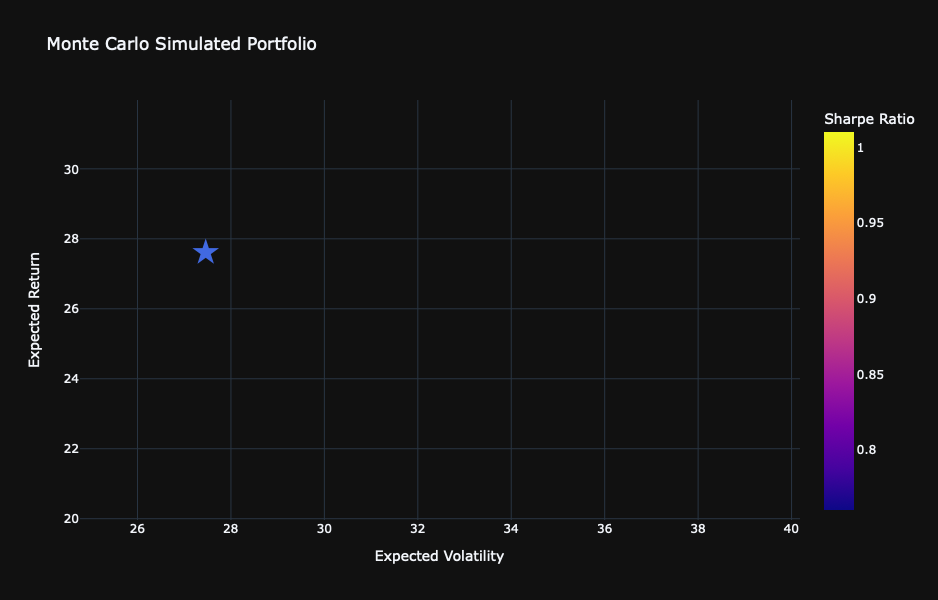

In [22]:
# Plot simulated portfolio
fig = px.scatter(
    temp, x='port_vols', y='port_rets', color='sharpe_ratio', 
    labels={'port_vols': 'Expected Volatility', 'port_rets': 'Expected Return','sharpe_ratio': 'Sharpe Ratio'},
    title="Monte Carlo Simulated Portfolio"
     ).update_traces(mode='markers', marker=dict(symbol='cross'))

# Plot max sharpe 
fig.add_scatter(
    mode='markers', 
    x=[temp.iloc[temp.sharpe_ratio.idxmax()]['port_vols']], 
    y=[temp.iloc[temp.sharpe_ratio.idxmax()]['port_rets']], 
    marker=dict(color='RoyalBlue', size=20, symbol='star'),
    name = 'Max Sharpe'
).update(layout_showlegend=False)

# Show spikes
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)
fig.show()

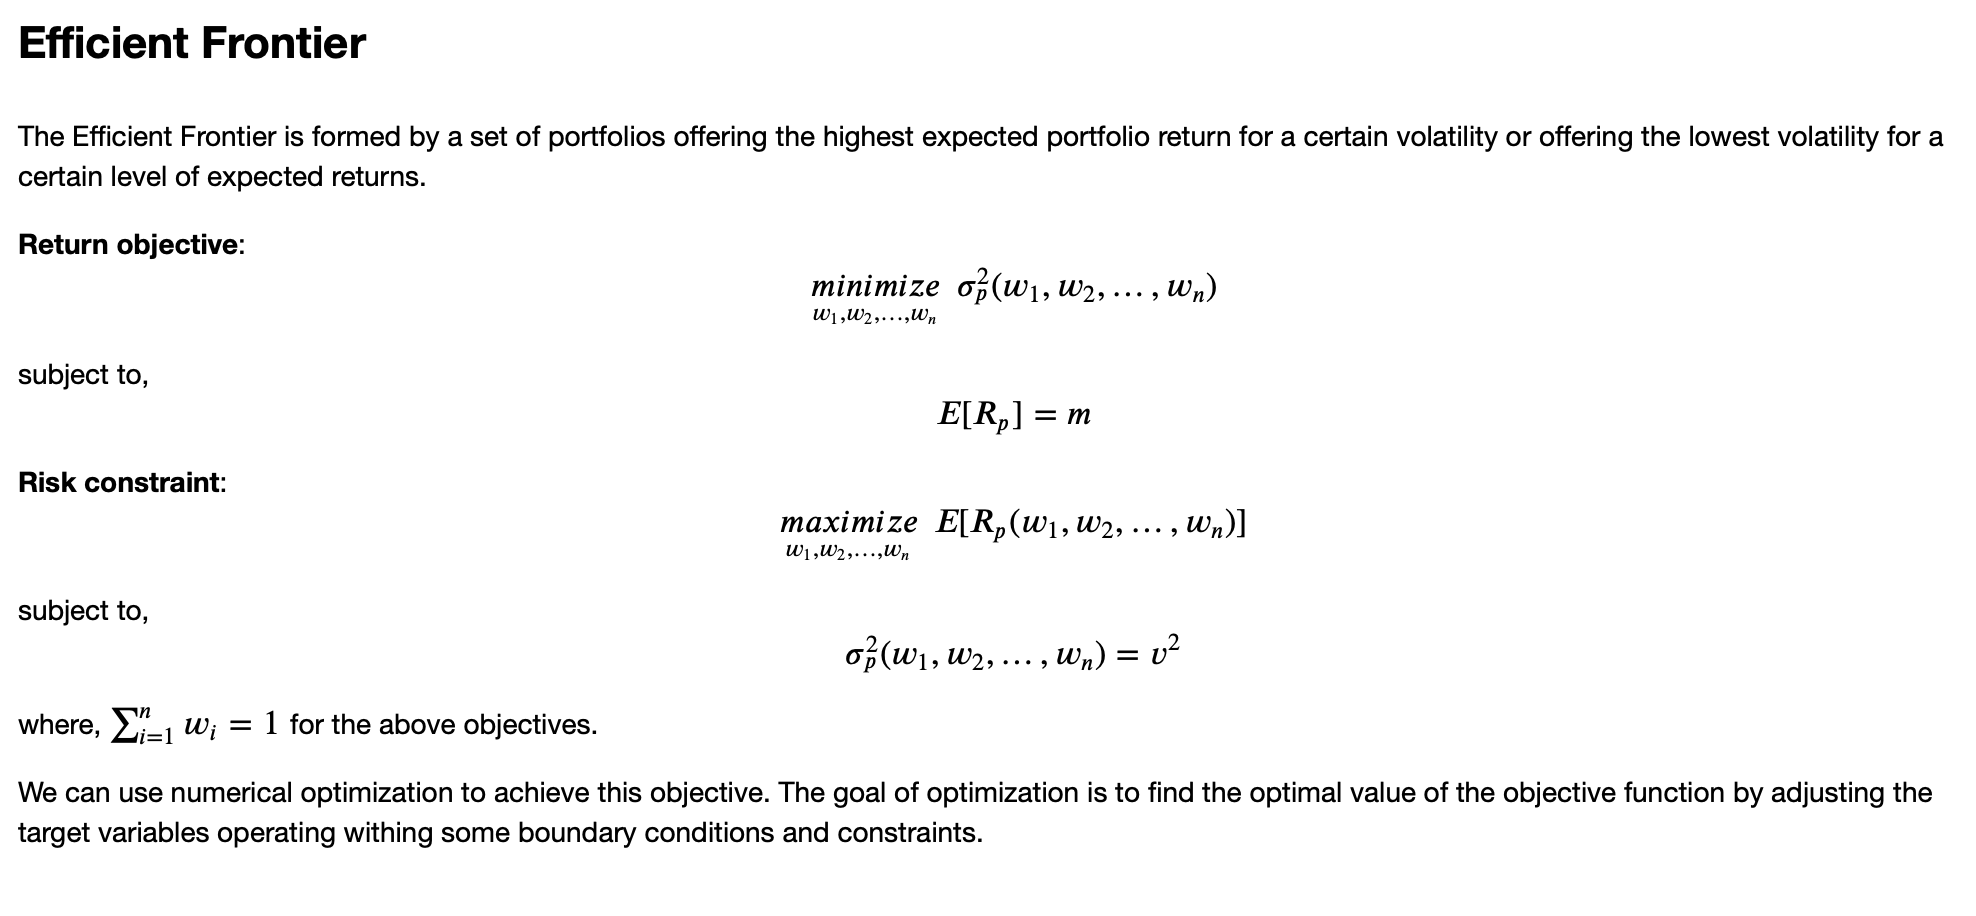

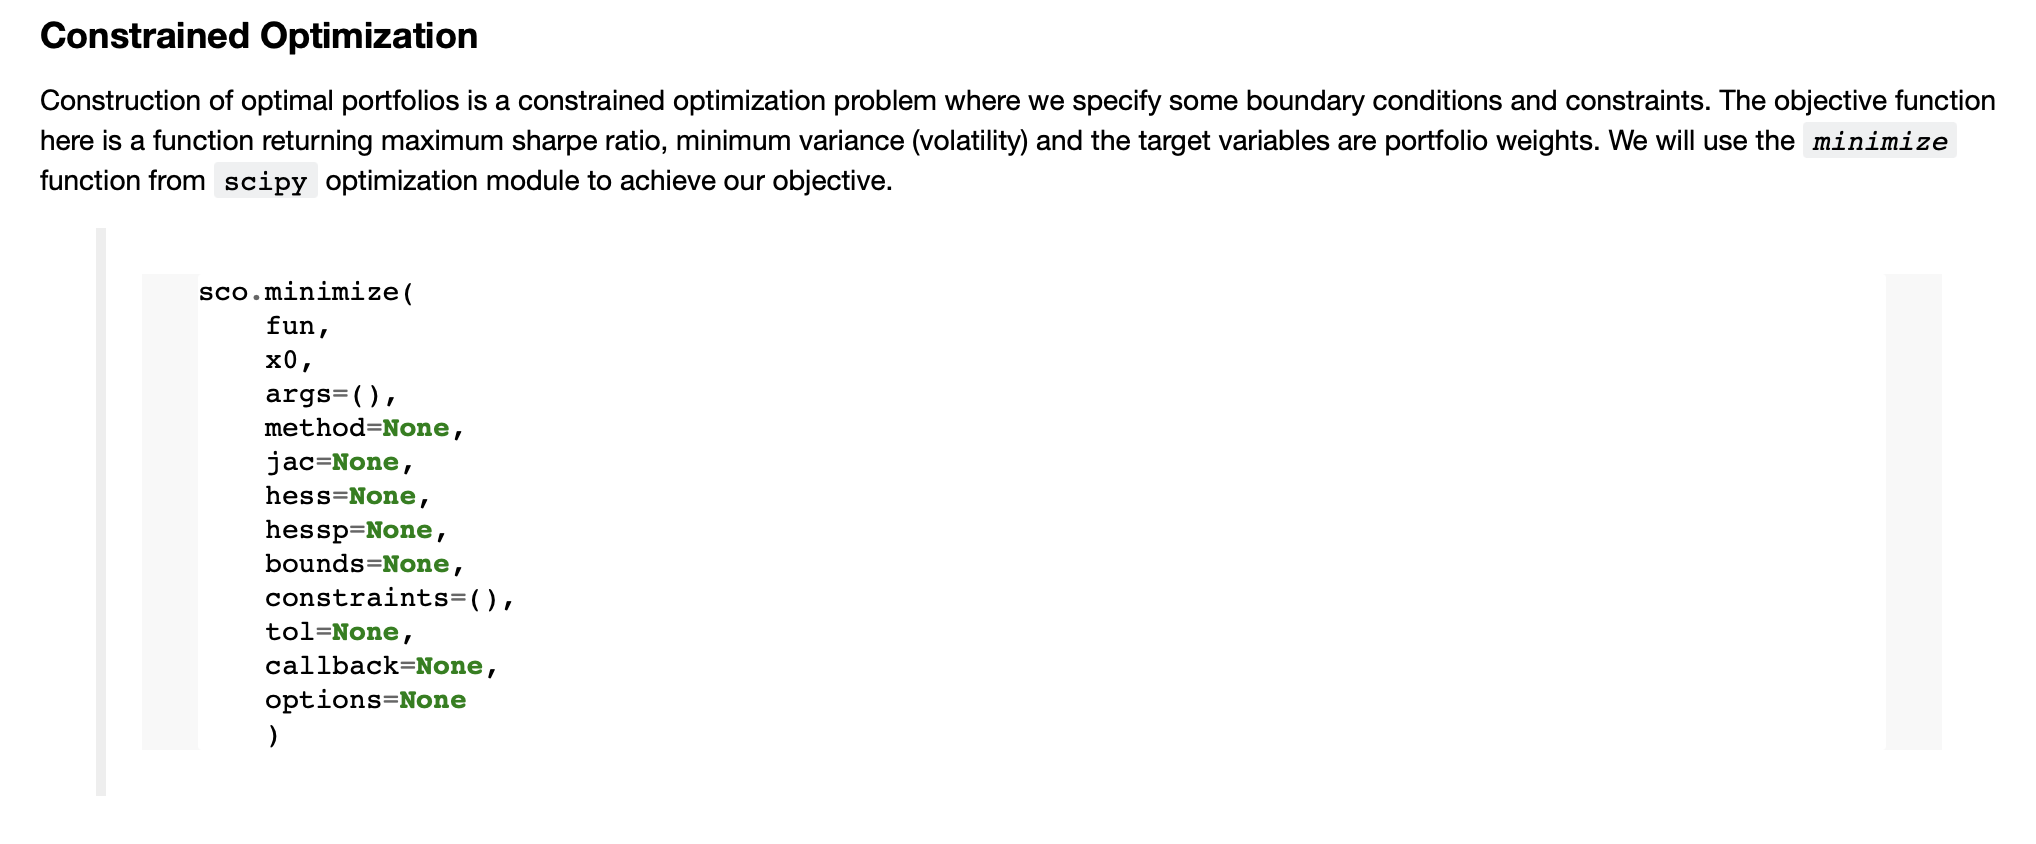

In [23]:
# Import optimization module from scipy
import scipy.optimize as sco

# Portfolio statistics function
Let's subsume key statistics into a function which can be used for optimization exercise.

In [24]:
# Define portfolio stats function
def portfolio_stats(weights):
    
    weights = array(weights)[:,newaxis]
    port_rets = weights.T @ array(returns.mean() * 252)[:,newaxis]    
    port_vols = sqrt(multi_dot([weights.T, returns.cov() * 252, weights])) 
    
    return array([port_rets, port_vols, port_rets/port_vols]).flatten()

## Example 1 : Maximum sharpe ratio portfolio

In [25]:
# Maximizing sharpe ratio
def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]

In [27]:
numofasset = 5
# Each asset boundary ranges from 0 to 1
tuple((0, 1) for x in range(numofasset))

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [28]:
# Specify constraints and bounds
cons = ({'type': 'eq', 'fun': lambda x: sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofasset))
initial_wts = numofasset*[1./numofasset]

In [29]:
# Optimizing for maximum sharpe ratio
opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)
opt_sharpe

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0118406086387546
       x: [ 2.543e-01  1.281e-01  7.589e-17  4.553e-01  1.623e-01]
     nit: 7
     jac: [-6.853e-05 -1.041e-04  1.161e-01  3.225e-05  9.909e-05]
    nfev: 42
    njev: 7

In [32]:
# Portfolio weights
list(zip(symbols, around(opt_sharpe['x']*100,2)))

[('AAPL', 25.43),
 ('AMZN', 12.81),
 ('MSFT', 0.0),
 ('GOOG', 45.53),
 ('NFLX', 16.23)]

In [38]:
# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats, around(portfolio_stats(opt_sharpe['x']),4)))

[('Returns', 0.2709), ('Volatility', 0.2678), ('Sharpe Ratio', 1.0118)]

## Example 2 : Minumum variance portfolio

In [34]:
# Minimize the variance
def min_variance(weights):
    return portfolio_stats(weights)[1]**2

In [35]:
# Optimizing for minimum variance
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)
opt_var

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.06565345021826804
       x: [ 2.663e-01  8.055e-02  3.431e-01  2.894e-01  2.065e-02]
     nit: 9
     jac: [ 1.312e-01  1.313e-01  1.313e-01  1.314e-01  1.313e-01]
    nfev: 54
    njev: 9

In [36]:
# Portfolio weights
list(zip(symbols, around(opt_var['x']*100,2)))

[('AAPL', 26.63),
 ('AMZN', 8.06),
 ('MSFT', 34.31),
 ('GOOG', 28.94),
 ('NFLX', 2.06)]

In [39]:
# Portfolio stats
list(zip(stats, around(portfolio_stats(opt_var['x']),4)))

[('Returns', 0.2375), ('Volatility', 0.2562), ('Sharpe Ratio', 0.9268)]

## Example 3 : Efficient Frontier portfolio
For efficient frontier portfolios, we fix a target return and derive for objective function.

In [40]:
# Minimize the volatility
def min_volatility(weights):
    return portfolio_stats(weights)[1]

In [41]:
# Efficient frontier params
targetrets = linspace(0.20,0.60,100)
tvols = []

for tr in targetrets:
    
    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: sum(x) - 1})
    
    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)
    
    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

In [42]:
# Dataframe for EF
efport = pd.DataFrame({
    'targetrets' : around(100*targetrets,2),
    'targetvols': around(100*targetvols,2),
    'targetsharpe': around(targetrets/targetvols,2)
})

efport.head()

targetrets  targetvols  targetsharpe
0       20.00       27.37          0.73
1       20.40       26.95          0.76
2       20.81       26.63          0.78
3       21.21       26.35          0.80
4       21.62       26.13          0.83

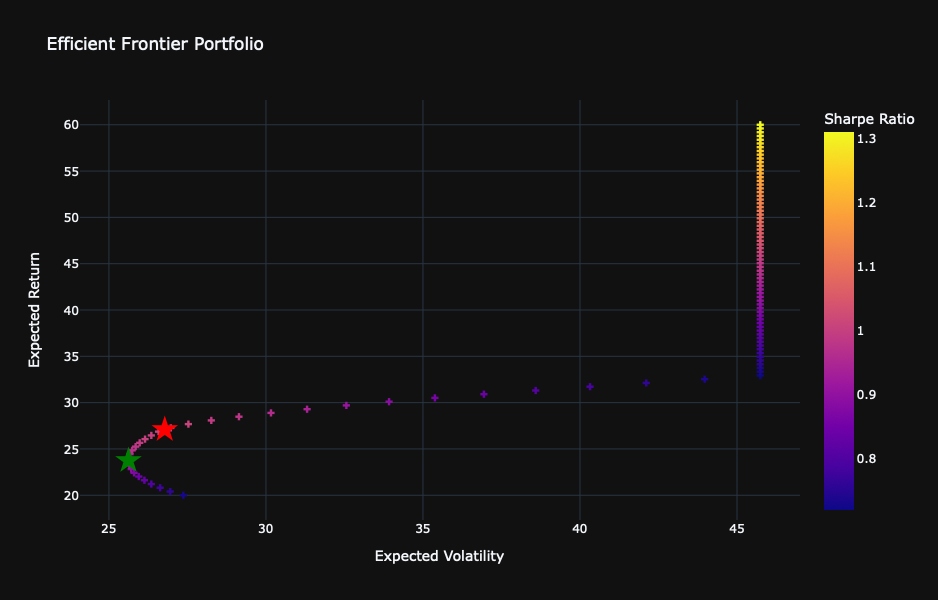

In [43]:
# Plot efficient frontier portfolio
fig = px.scatter(
    efport, x='targetvols', y='targetrets',  color='targetsharpe',
    labels={'targetrets': 'Expected Return', 'targetvols': 'Expected Volatility','targetsharpe': 'Sharpe Ratio'},
    title="Efficient Frontier Portfolio"
     ).update_traces(mode='markers', marker=dict(symbol='cross'))


# Plot maximum sharpe portfolio
fig.add_scatter(
    mode='markers',
    x=[100*portfolio_stats(opt_sharpe['x'])[1]], 
    y=[100*portfolio_stats(opt_sharpe['x'])[0]],
    marker=dict(color='red', size=20, symbol='star'),
    name = 'Max Sharpe'
).update(layout_showlegend=False)

# Plot minimum variance portfolio
fig.add_scatter(
    mode='markers',
    x=[100*portfolio_stats(opt_var['x'])[1]], 
    y=[100*portfolio_stats(opt_var['x'])[0]],
    marker=dict(color='green', size=20, symbol='star'),
    name = 'Min Variance'
).update(layout_showlegend=False)

# Show spikes
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)
fig.show()